In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
loan_dataset = pd.read_csv("./Datasets/train_loan_data.csv")

In [3]:
loan_dataset.shape

(614, 13)

In [4]:
# find missing value 
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# remove the missing value
loan_dataset = loan_dataset.dropna()

In [6]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
# label encoding
loan_dataset.replace({'Loan_Status' : {'Y':1, 'N':0}}, inplace= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13784\1215395565.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status' : {'Y':1, 'N':0}}, inplace= True)


In [8]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [9]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [10]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [11]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

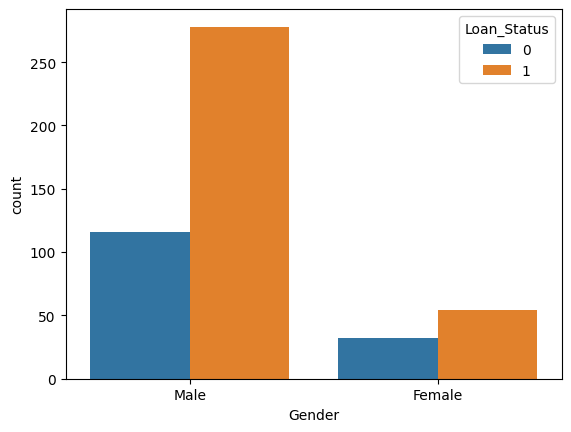

In [12]:
sns.countplot(x="Gender", hue="Loan_Status", data= loan_dataset)

In [13]:
loan_dataset.replace({'Gender': {'Male' : 1, 'Female' : 0}, 'Education' : {'Graduate':1 ,'Not Graduate': 0}, 'Self_Employed' : {'Yes': 1, 'No' : 0},
                       'Married': {'Yes':1, 'No':0},
                       'Property_Area': {'Rural': 0, 'Semiurban':1, 'Urban' : 2}},
                         inplace= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13784\3753498746.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Gender': {'Male' : 1, 'Female' : 0}, 'Education' : {'Graduate':1 ,'Not Graduate': 0}, 'Self_Employed' : {'Yes': 1, 'No' : 0},


In [14]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [15]:
X = loan_dataset.drop(['Loan_ID','Loan_Status'], axis=1)
y = loan_dataset['Loan_Status']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
model = SVC(kernel="linear")

In [31]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
# accurecy score
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy score of training data : ", train_data_accuracy)

Accuracy score of training data :  0.8046875


In [33]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print("Accuracy score of test data : ", test_data_accuracy)

Accuracy score of test data :  0.8333333333333334
